In [54]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt

import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model

from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler



In [55]:
df = pd.read_csv('ecg.csv',sep=',',header=None)
df
#1 for normal, 0 for abnormal

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


In [56]:
df.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
      dtype='int64', length=141)

In [57]:
# #Do colum processing
df = df.add_prefix('c')


In [58]:
df['c140'].value_counts()

c140
1.0    2919
0.0    2079
Name: count, dtype: int64

In [59]:
#How data looks like
df.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


In [60]:
#spilt data using sklearn
train_data, test_data, train_labels, test_labels = train_test_split(df.drop('c140', axis=1), df['c140'], test_size=0.2, random_state=42)
# x=df.drop('c140', axis=1), y = df['c140']

In [61]:
#scaling data, becasue neural network works better with scaled data
scaler = MinMaxScaler()
#transform data
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.fit_transform(test_data)


In [62]:
train_data_scaled

array([[0.6198103 , 0.54933545, 0.32754152, ..., 0.76697592, 0.70317822,
        0.42847614],
       [0.59365998, 0.62075353, 0.56918273, ..., 0.59314245, 0.53575535,
        0.47155381],
       [0.43071076, 0.3571988 , 0.26708694, ..., 0.64342027, 0.63800556,
        0.45782433],
       ...,
       [0.45442466, 0.35540716, 0.19809345, ..., 0.77837157, 0.74294265,
        0.50709418],
       [0.40345124, 0.39132017, 0.33469886, ..., 0.4868497 , 0.50193227,
        0.47770011],
       [0.37134117, 0.25002207, 0.14599874, ..., 0.71048947, 0.65626497,
        0.35023474]])

In [63]:
#spilt data into normal and abnormal data
normal_train_data = train_data_scaled[train_labels == 1]
abnormal_train_data = train_data_scaled[train_labels == 0]

In [64]:
normal_test_data = test_data_scaled[test_labels == 1]
abnormal_test_data = test_data_scaled[test_labels == 0]

In [65]:
print("Normal train data: ", normal_train_data.shape)
print("Normal test data: ", normal_test_data.shape)
print("Abnormal train data: ", abnormal_train_data.shape)
print("Abnormal test data: ", abnormal_test_data.shape)

Normal train data:  (2328, 140)
Normal test data:  (591, 140)
Abnormal train data:  (1670, 140)
Abnormal test data:  (409, 140)


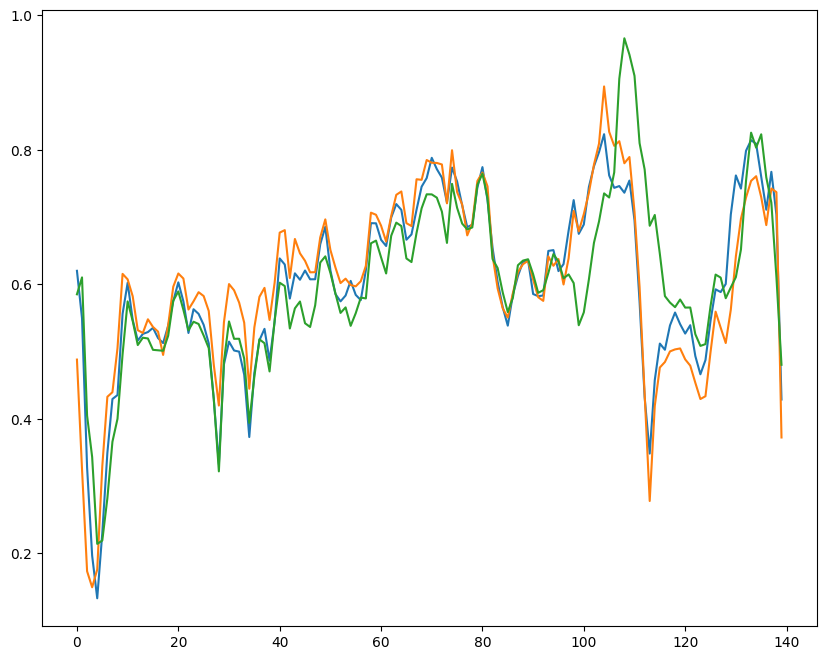

In [ ]:
#See normal data ecg
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[100])
plt.plot(normal_train_data[200])

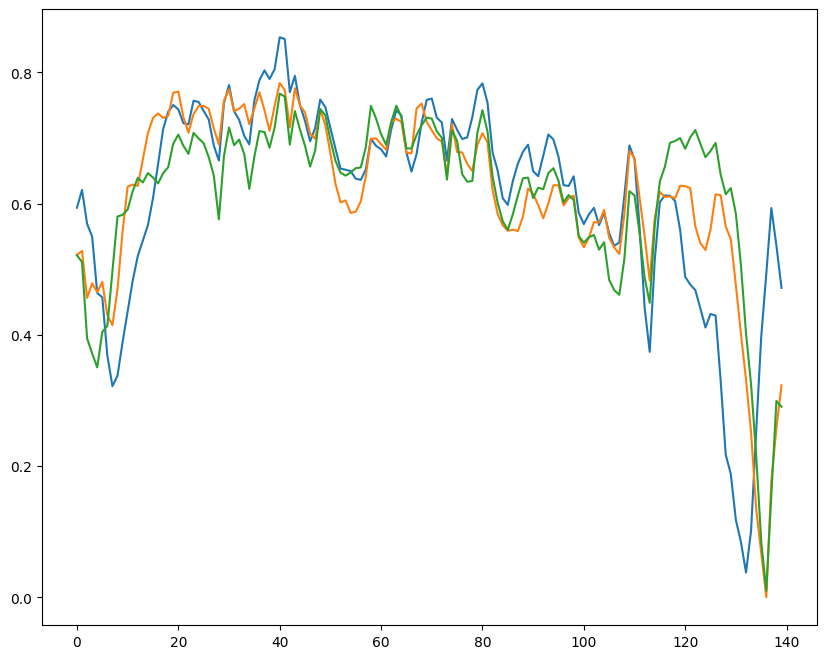

In [ ]:
#see abnormal data ecg
plt.plot(abnormal_train_data[0])
plt.plot(abnormal_train_data[100])
plt.plot(abnormal_train_data[200])

In [ ]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(8, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(140, activation='sigmoid')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded
    

In [ ]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')
model.compile(optimizer='adam', loss='mae')


In [ ]:
#unsurpervised learning, so we will pass some dummy values
#validate: try also to separate normal and abnormal data, why passing all data both normal and abnormal train_data_scaled  
#shuffle: meaning and lstm not shuffle
history = model.fit(normal_train_data, normal_train_data,epochs=50, batch_size=128, 
                    validation_data=(train_data_scaled, train_data_scaled), 
                    shuffle=True, callbacks=[early_stopping])
#20:30

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1374 - val_loss: 0.1225
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1001 - val_loss: 0.0854
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0611 - val_loss: 0.0768
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0473 - val_loss: 0.0743
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0463 - val_loss: 0.0743
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0462 - val_loss: 0.0740
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0451 - val_loss: 0.0738
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0468 - val_loss: 0.0738
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0445 - val_loss: 0.0735
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0463 - val_loss: 0.0730
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0451 - val_loss: 0.0726
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0451 -

In [70]:
encoder_out = model.encoder(normal_test_data).numpy()
decoder_out = model.decoder(encoder_out).numpy()

In [71]:
encoder_out.shape

(591, 8)

In [72]:
decoder_out.shape

(591, 140)

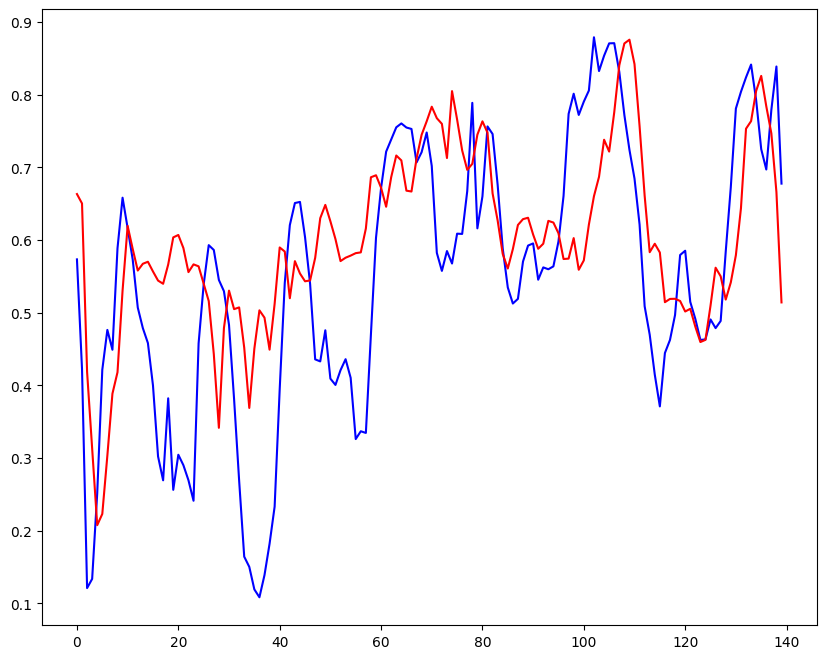

In [77]:
plt.plot(normal_test_data[2], 'blue')
plt.plot(decoder_out[2], 'red')

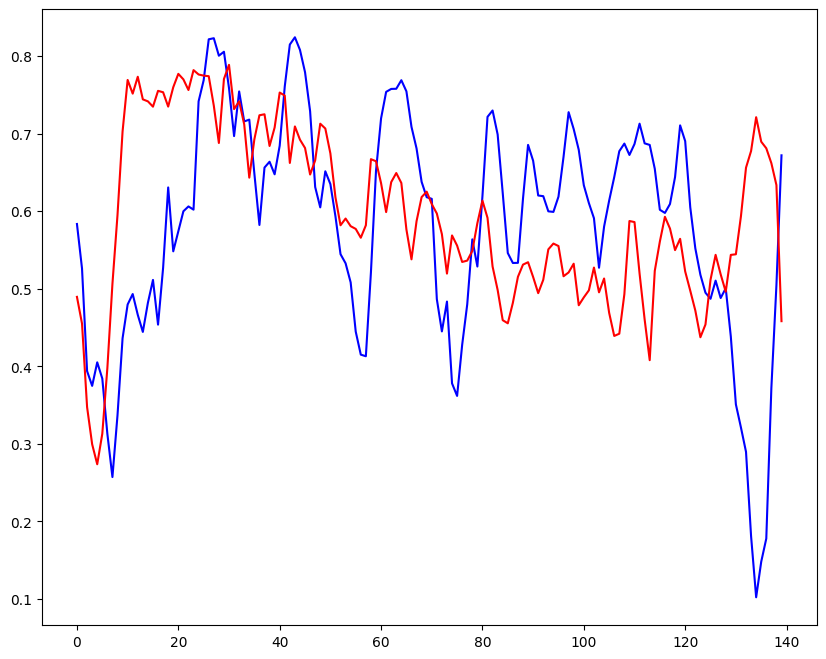

In [76]:
encoder_out_abnormal = model.encoder(abnormal_test_data).numpy()
decoder_out_abnormal = model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')